 INTERMEDIATE LEVEL TASK - 1

**NAME : KIRUTHIKA S**

**LANGUAGE : PYTHON**

#Prediction using Decision Tree  Algorithm 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Iris.csv - Iris.csv (3).csv")

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#dropping the ID column as it is unique
df.drop("SepalLengthCm", axis=1 , inplace=True)

In [ ]:
df.describe()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


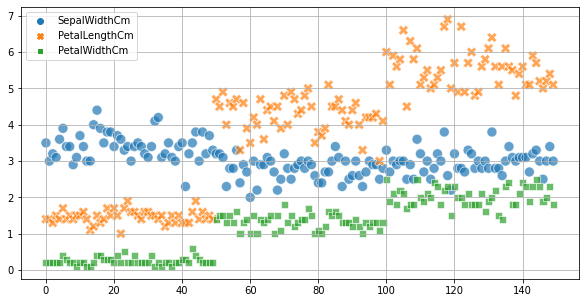

In [ ]:
#Plotting distribution of data
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, s=100, alpha=0.7)
plt.grid()
plt.show()

In [ ]:
#Extracting independent & dependent variables from dataset
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier( criterion="entropy" , max_depth = 4 )
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test , y_pred)

0.9777777777777777

In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [ ]:
#Text representation of the Decision Tree

In [ ]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz

In [ ]:
text_rep = tree.export_text(classifier)
print(text_rep)

|--- feature_2 <= 0.75
|   |--- class: Iris-setosa
|--- feature_2 >  0.75
|   |--- feature_1 <= 4.95
|   |   |--- feature_2 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  1.65
|   |   |   |--- feature_0 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_0 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_1 >  4.95
|   |   |--- feature_1 <= 5.05
|   |   |   |--- feature_0 <= 2.75
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_0 >  2.75
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_1 >  5.05
|   |   |   |--- class: Iris-virginica



In [ ]:
# export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.
dot_data =StringIO()
filename = "iris_classification.png"
features=df.columns.tolist()[:-1] #column names
target=df['Species'].unique() #target column
fig = plt.figure(figsize=(15,15))
dt = tree.export_graphviz(classifier, feature_names=features, out_file=dot_data, 
                          class_names=target, filled=True,rotate=False,rounded = True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200),dpi=100)
plt.imshow(img,interpolation='nearest')

<Figure size 1080x1080 with 0 Axes>